## 🚀 Importing the Dependencies

In [34]:
# Core data and analysis tools
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Visualization tools
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("sleep_health.csv")
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


### 🧹 Data Cleaning

This section covers the steps taken to clean and preprocess the dataset, including handling duplicates, missing values, and preparing variables for analysis.

In [1]:
# Checking for duplicates
df.duplicated().sum()

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Basic stats
df.describe()

NameError: name 'df' is not defined

### 🔄 Handling Missing Values

Changing the `NaN` values to `None` for better compatibility and clarity in further analysis.

In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].where(pd.notna(df['Sleep Disorder']), None)

df['Sleep Disorder'].value_counts(dropna=False)

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

### 🧮 Function to Check the Strength of the Correlation Test

This function helps interpret the strength and direction of a correlation coefficient, making your statistical analysis more insightful! 📊

In [12]:
def get_strength(corr):
    if corr <= -0.7:
        return "STRONG NEGATIVE"
    elif corr <= -0.3:
        return "MODERATE NEGATIVE"
    elif corr < 0:
        return "WEAK NEGATIVE"
    elif corr < 0.3:
        return "WEAK"
    elif corr < 0.7:
        return "MODERATE"
    else:
        return "STRONG"

### 🧑‍🤝‍🧑🔍 What is the correlation between `Gender` and `Sleep Duration`?

Let's explore whether there is a relationship between a person's gender and how long they sleep on average. Understanding this correlation can provide insights into sleep patterns across different genders! 🌙📊

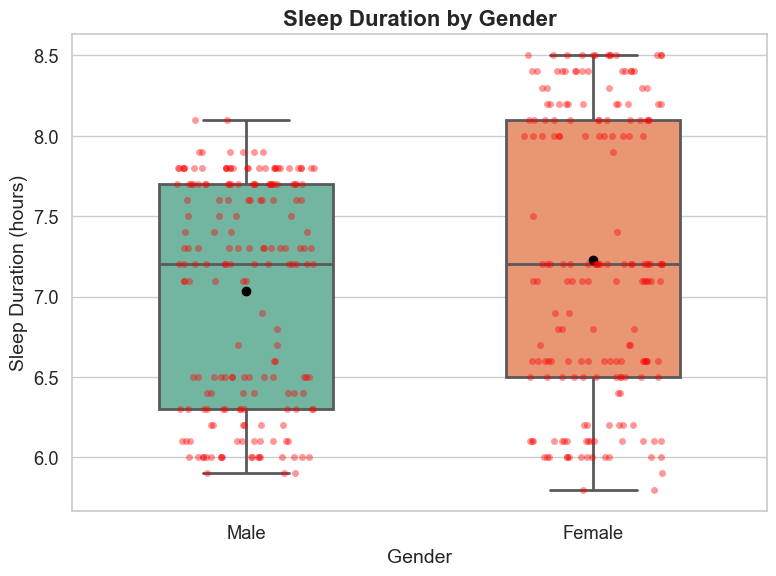

In [58]:
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    x="Gender",
    y="Sleep Duration",
    hue="Gender",
    data=df,
    palette="Set2",
    width=0.5,
    linewidth=2,
    showmeans=True,
    meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black"},
    legend=False
)
sns.stripplot(
    x="Gender",
    y="Sleep Duration",
    data=df,
    color="red",
    alpha=0.4,
    jitter=0.2,
    dodge=True
)
ax.set_title("Sleep Duration by Gender", fontsize=16, fontweight='bold')
ax.set_xlabel("Gender", fontsize=14)
ax.set_ylabel("Sleep Duration (hours)", fontsize=14)
plt.tight_layout()
plt.show()

### 🌙✨ **Is there a correlation between `Sleep Duration` and `Quality of Sleep`?**

Let's find out if sleeping longer is actually linked to better sleep quality! 📈😴

Pearson correlation coefficient:  0.8832130004106167
p-value:  2.170991770869847e-124


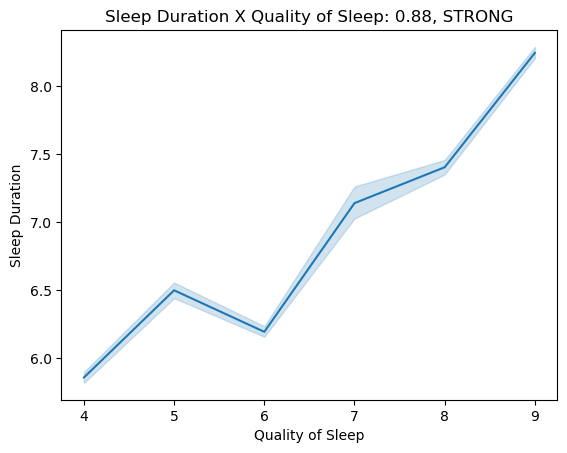

In [35]:
corr_coef, p_value = pearsonr(df["Quality of Sleep"], df["Sleep Duration"])

sns.lineplot(x=df["Quality of Sleep"], y=df["Sleep Duration"]).set_title(f"Sleep Duration X Quality of Sleep: {round(corr_coef, 2)}, {get_strength(corr_coef)}")

print("Pearson correlation coefficient: ", corr_coef)
print("p-value: ", p_value)


### 🧪✨ **ANOVA: Does Occupation Affect Sleep Quality?**

Let's investigate whether your job might influence how well you sleep! We'll use ANOVA (Analysis of Variance) to compare the average sleep quality across different occupations. 🛌💼

Understanding these differences can help reveal if certain professions are linked to better or worse sleep quality. 🌙🔍

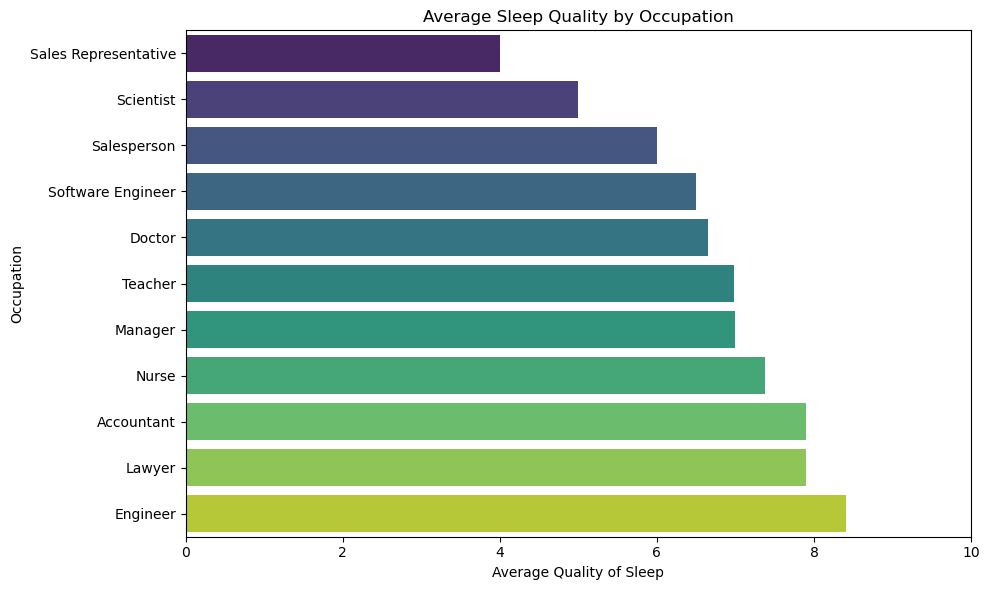

In [21]:
# Group and sort
mean_quality = df.groupby("Occupation", as_index=False)["Quality of Sleep"].mean()
mean_quality = mean_quality.sort_values("Quality of Sleep")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=mean_quality,
    x="Quality of Sleep",
    y="Occupation",
    hue="Occupation",     
    palette="viridis",
    legend=False             
)

plt.title("Average Sleep Quality by Occupation")
plt.xlabel("Average Quality of Sleep")
plt.ylabel("Occupation")
plt.xlim(0, 10)  # Optional: adapt to your scale
plt.tight_layout()
plt.show()

### 🧪😴 ANOVA: Does Occupation Affect Sleep Duration?

Let's analyze whether your job influences how long you sleep! We'll use ANOVA (Analysis of Variance) to compare the average sleep duration across different occupations. 🛌💼

Understanding these differences can reveal if certain professions are linked to shorter or longer sleep durations. 🌙🔍

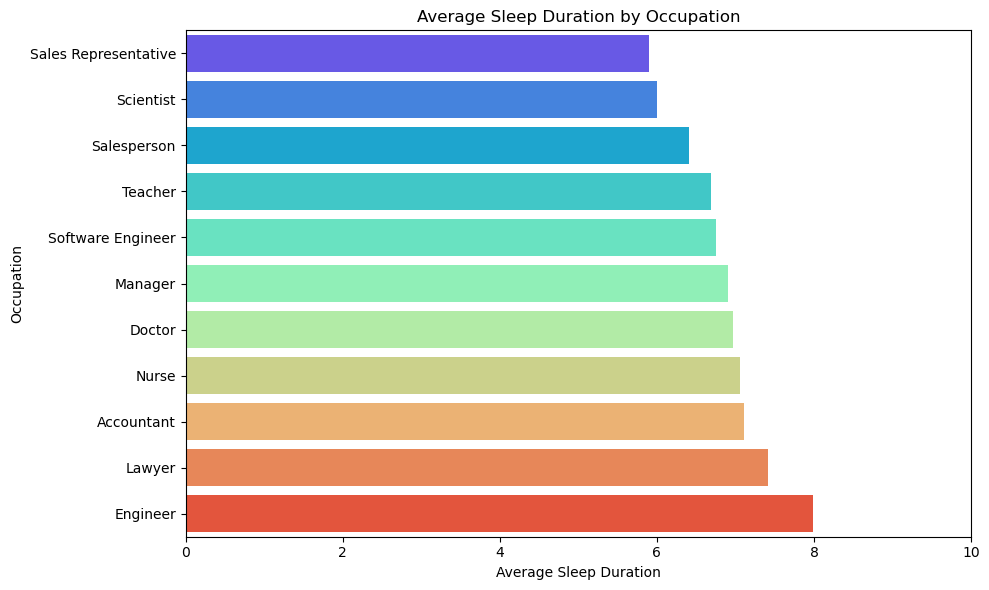

In [25]:
# Group and sort
mean_quality = df.groupby("Occupation", as_index=False)["Sleep Duration"].mean()
mean_quality = mean_quality.sort_values("Sleep Duration")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=mean_quality,
    x="Sleep Duration",
    y="Occupation",
    hue="Occupation",     
    palette="rainbow",
    legend=False             
)

plt.title("Average Sleep Duration by Occupation")
plt.xlabel("Average Sleep Duration")
plt.ylabel("Occupation")
plt.xlim(0, 10)  # Optional: adapt to your scale
plt.tight_layout()
plt.show()

### 💓🚶‍♂️🏃‍♂️ Correlation Between `Heart Rate`, `Daily Steps`, and `Physical Activity Level`

This section explores how your heart rate relates to your daily steps and physical activity level. Understanding these correlations can reveal how movement and exercise impact cardiovascular health! 📊💪

- **Heart Rate**: 💓
- **Daily Steps**: 🚶‍♂️
- **Physical Activity Level**: 🏃‍♂️

We'll visualize and interpret the relationships between these variables to uncover meaningful health insights.

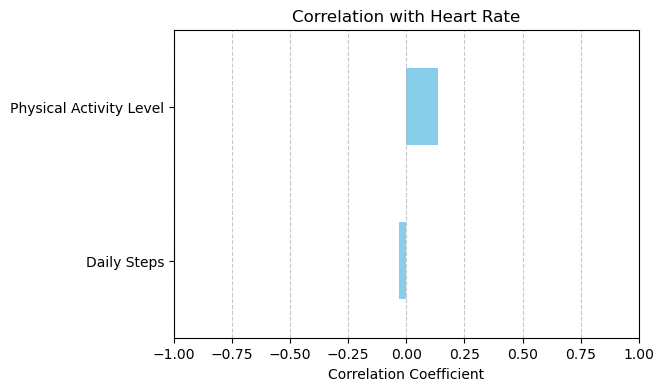

In [27]:
target = "Heart Rate"
features = ["Daily Steps", "Physical Activity Level"]

# Compute correlation of each feature with Heart Rate
correlations = df[features + [target]].corr(method="pearson")[target].drop(target)

# Plot as bar chart
plt.figure(figsize=(6, 4))
correlations.sort_values().plot(kind='barh', color='skyblue')
plt.title(f"Correlation with {target}")
plt.xlabel("Correlation Coefficient")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(-1, 1)
plt.show()

### 📊🔗 Correlation between `Age` and `Stress Level`

Let's explore whether there's a relationship between a person's age and how long they sleep on average. Understanding this correlation can reveal important insights into sleep patterns across different age groups! 😴📈

Pearson Correlation: -0.42
p-value: 0.0000


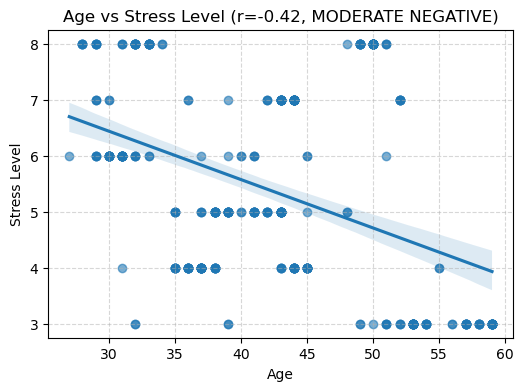

In [33]:
# Pearson correlation
corr, p_val = pearsonr(df["Age"], df["Stress Level"])
print(f"Pearson Correlation: {corr:.2f}")
print(f"p-value: {p_val:.4f}")

# Scatterplot
plt.figure(figsize=(6, 4))
sns.regplot(x="Age", y="Stress Level", data=df, scatter_kws={"alpha":0.6})
plt.title(f"Age vs Stress Level (r={corr:.2f}, {get_strength(corr)})")
plt.xlabel("Age")
plt.ylabel("Stress Level")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()